# 1. Data Preprocessing

In [208]:
#importing all the required libraries
import pandas as pd
import os 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [209]:
os.chdir("E:/Python Projects")
df = pd.read_excel('Furniture Superstore.xls')

In [210]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [211]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [212]:
#we start from time series analysis and forecasting for furniture sales.
furniture = df.loc[df['Category'] == 'Furniture'] 

In [213]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [214]:
#Removing columns we do not need for analysis
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [215]:
furniture = furniture.sort_values('Order Date')

In [216]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [217]:
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [218]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


### 2. Indexing with Time Series Data

In [219]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [220]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [221]:
#Averages daily sales value for that month instead, and we are using the start of each month as the timestamp.
y = furniture['Sales'].resample('MS').mean() 

In [222]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [223]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

### 3. Visualizing Furniture Sales Time Series Data

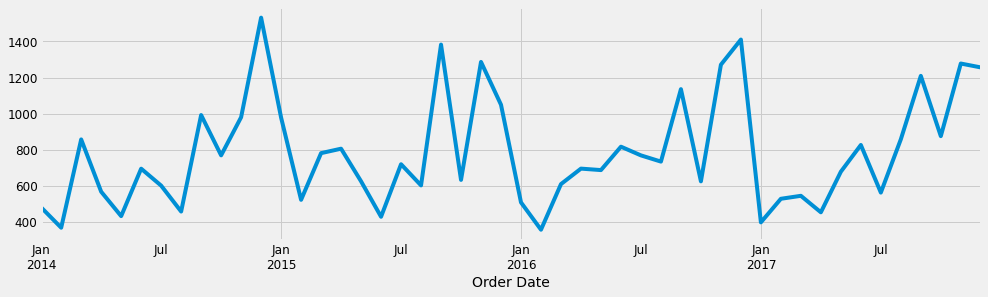

In [281]:
y.plot(figsize=(15, 4))
plt.show()

### 4. Adfuller Test is the method

In [ ]:
# If series is having no trend  no seasonality , it is stationary
# Stationary check
# Null hypothesis time serries is not stationary
# Alternatie hypothesis time series is stationary
# d-f test returns <0.05, reject null hypothesis. , it will be stationary

In [225]:
from statsmodels.tsa.stattools import adfuller

In [226]:
adfest=adfuller(y)
print(adfest[1])

9.168756655665654e-06


 As p value is less than 0.05, we reject the null hypothesis, which says thet series is stationary.
 p value < 0.05, reject null hypothesis ,series stationary.

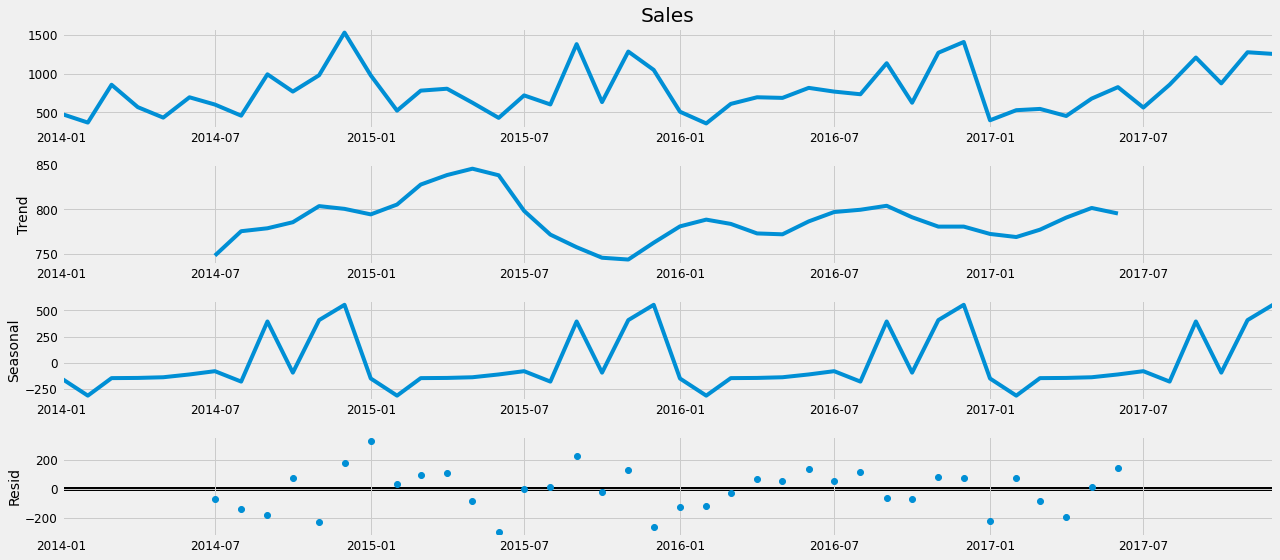

In [227]:
#Lets seperate Trend,season and error
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(y,model='additive')
fig=decomposition.plot()
plt.show()

In [228]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [229]:
len(y)

48

In [230]:
train=y[:34]
train

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
Freq: MS, Name: Sales, dtype: float64

In [231]:
test=y[34:]
test

Order Date
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [232]:
y.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [233]:
print('train data',len(train))
print('test data',len(test))

train data 34
test data 14


### 5. Building a ARIMA model on train data

In [234]:
from statsmodels.tsa.arima.model import ARIMA

In [235]:
import warnings 
warnings.filterwarnings('ignore')

In [236]:
model=ARIMA(train,order=(5,0,4)).fit() #Assuming 5,0,4 as order we start

In [237]:
len(train),(len(y)-1)

(34, 47)

In [238]:
pred=model.predict(start=len(train),end=(len(y)-1))

In [239]:
pred.head()

2016-11-01    655.236803
2016-12-01    648.359756
2017-01-01    587.937341
2017-02-01    680.918112
2017-03-01    825.743182
Freq: MS, Name: predicted_mean, dtype: float64

In [264]:
pred.tail()

2017-08-01    624.872252
2017-09-01    624.872252
2017-10-01    624.872252
2017-11-01    624.872252
2017-12-01    624.872252
Freq: MS, Name: predicted_mean, dtype: float64

### 6. Model Evaluation

In [240]:
from sklearn.metrics import mean_squared_error

In [241]:
error=np.sqrt(mean_squared_error(test,pred))
error

398.44911373173375

In [265]:
test.mean(),np.sqrt(test.var())

(867.8552960939827, 354.86068413474936)

<AxesSubplot:xlabel='Order Date'>

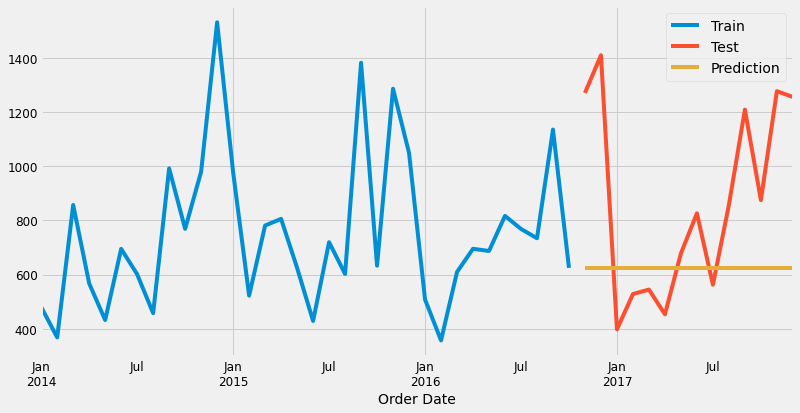

In [272]:
train.plot(legend=True,label='Train',figsize=(12,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction')

Clearly our assumption for p,q,d seems to be wrong.

### 7. Make model with orginal (full) data predict future data

In [244]:
final_model=ARIMA(y,order=(5,0,4)).fit() 

In [245]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -326.581
Date:                Thu, 13 Oct 2022   AIC                            675.161
Time:                        19:03:56   BIC                            695.745
Sample:                    01-01-2014   HQIC                           682.940
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        786.1401      3.182    247.020      0.000     779.903     792.378
ar.L1          0.6356      0.360      1.766      0.077      -0.070       1.341
ar.L2         -0.1299      0.229     -0.567      0.571      -0.579       0.319
ar.L3          0.7280      0.103      7.061      0.000       0.526       0.930
ar.L4         -0.9062      0.251     -3.615      0.000      -1.397      -0.415
ar.L5         -0.0231      0.351     -0.066      0.948      -0.712       0.665
ma.L1         -0.7648     11.215     -0.068      0.946     -22.746      21.217
ma.L2         -0.1607      1.529     -0.105      0.916      -3.158       2.837
ma.L3         -0.9207      9.481     -0.097      0.923     -19.502      17.661
ma.L4          0.8473      0.527      1.609      0.108      -0.185       1.879
sigma2       4.28e+04      0.000   2.33e+08      0.000    4.28e+04    4.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.80   Prob(JB):                         0.11
Heteroskedasticity (H):               0.76   Skew:                             0.74
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+25. Standard errors may be unstable.
"""

In [246]:
prediction=final_model.predict(start=len(y),end=(len(y)+6))
prediction

2018-01-01    551.527879
2018-02-01    610.940605
2018-03-01    596.423876
2018-04-01    241.016446
2018-05-01    538.533997
2018-06-01    725.669853
2018-07-01    559.003200
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

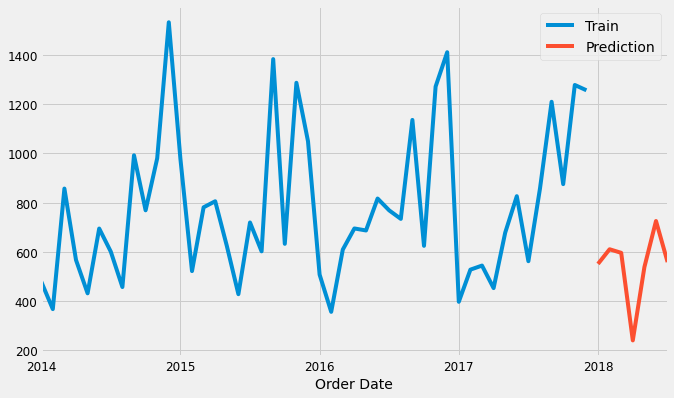

In [247]:
y.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')

### 8. Method to find p,q and d using custom for loop.

In [248]:
import itertools

In [249]:
p=range(0,8) #for AR
q=range(0,8) #for MA
d=range(0,2) #Generally not required more than 3 difference 0,1 & 2

In [250]:
pdq_combination=list(itertools.product(p,d,q))

In [251]:
len(pdq_combination)

128

In [252]:
rmse=[]
order1=[]

In [253]:
 for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(y)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [254]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])
results.head()

,RMSE
"(0, 0, 0)",361.827246
"(0, 0, 1)",364.988276
"(0, 0, 2)",364.391912
"(0, 0, 3)",352.912055
"(0, 0, 4)",352.752792


In [255]:
results['RMSE']

(0, 0, 0)    361.827246
(0, 0, 1)    364.988276
(0, 0, 2)    364.391912
(0, 0, 3)    352.912055
(0, 0, 4)    352.752792
                ...    
(7, 1, 3)    358.369383
(7, 1, 4)    362.372156
(7, 1, 5)    333.654328
(7, 1, 6)    421.055586
(7, 1, 7)    419.490363
Name: RMSE, Length: 127, dtype: float64

In [256]:
result_sort=results.sort_values('RMSE')

In [257]:
result_sort.head()

,RMSE
"(4, 0, 4)",250.312416
"(6, 0, 6)",257.747473
"(7, 0, 5)",267.959053
"(5, 1, 5)",299.252623
"(6, 1, 5)",301.754130


### 9. Predicting with (4,0,4) for p,q and d values

In [275]:
model2=ARIMA(train,order=(4,0,4)).fit() ## assuming p-4,q-0,d-4
model2

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
pred3=model2.predict(start=len(train),end=(len(y)-1))
pred3.head()

2016-11-01    834.525336
2016-12-01    944.511893
2017-01-01    600.632014
2017-02-01    601.432066
2017-03-01    725.931717
Freq: MS, Name: predicted_mean, dtype: float64

In [278]:
pred3.tail()

2017-08-01     872.032485
2017-09-01    1039.353384
2017-10-01     779.424953
2017-11-01     845.750151
2017-12-01     877.303724
Freq: MS, Name: predicted_mean, dtype: float64

### 10. Final model evaluation

In [279]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test, pred3))
error

250.31241551801153

<AxesSubplot:xlabel='Order Date'>

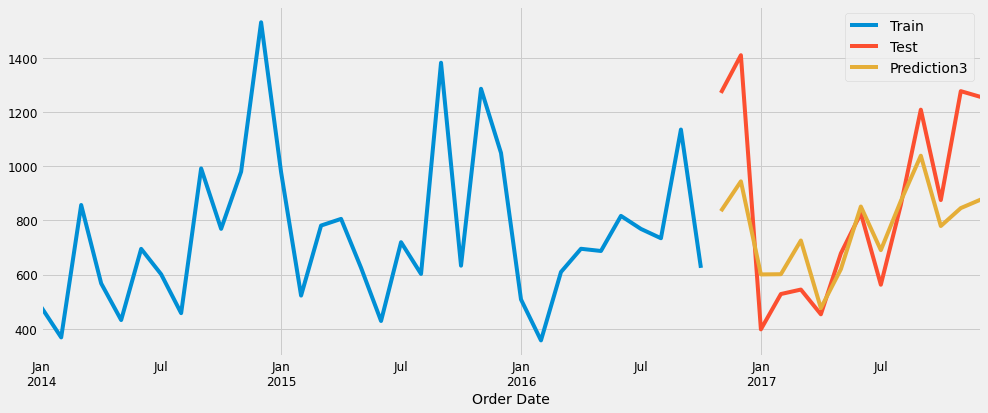

In [280]:
train.plot(legend=True,label='Train',figsize=(15,6))
test.plot(legend=True,label='Test')
pred3.plot(legend=True,label='Prediction3')